Laboratory exercise due to 24th of April 2024. 

Load the necessary libraries:

In [1]:
library(tidyverse)
library(geosphere)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


1) read the data and import in a data.frame or tibble structure

In [2]:
df2 <- read.csv("Data_CitiBike/JC-201902-citibike-tripdata.csv")
df3 <- read.csv("Data_CitiBike/JC-201903-citibike-tripdata.csv")
df4 <- read.csv("Data_CitiBike/JC-201904-citibike-tripdata.csv")
df5 <- read.csv("Data_CitiBike/JC-201905-citibike-tripdata.csv")
df6 <- read.csv("Data_CitiBike/JC-201906-citibike-tripdata.csv")

2) merge the five data frames in a unique structure

In [3]:
df <- rbind(df2, df3, df4, df5, df6)

3) check for missing data and remove it, if any

In [4]:
## na.omit(), when given a data.frame object, removes any row which has at least one missing value 
df <- na.omit(df)
nrow(df)

[1] 150792

As can be seen from the number of rows of the dataframe df printed above, since such number does not change, it means that no rows in the data.frame object had missing values.

4.1) compute the average and the median trip duration in minutes

In [5]:
avg_trip <- mean(df$tripduration)
med_trip <- median(df$tripduration)
print(paste("Average trip duration:", avg_trip))
print(paste("Median trip duration:", med_trip))

[1] "Average trip duration: 768.642766194493"
[1] "Median trip duration: 341"


4.2) evaluate the minimum and maximum trip duration; does that sound like a reasonable value?

In [6]:
min_trip <- min(df$tripduration)
max_trip <- max(df$tripduration)
print(paste("Minimum trip duration:",min_trip))
print(paste("Maximum trip duration:",max_trip))

[1] "Minimum trip duration: 61"
[1] "Maximum trip duration: 1729020"


As can be seen from the results printed above, the maximum trip duration is not a reasonable value for a bike trip, therefore it can be labelled as an outlier. 

4.3) repeat the calculation of the average (and the median) trip duration by excluding trips longer than
3 hours. Next, evaluate the number of skimmed entries

In [7]:
new_mean<-function(x){
    new_x <- x[x < 10800]
    return(mean(new_x))
}

new_med<-function(x){
    new_x <- x[x < 10800]
    return(median(new_x))
}

In [8]:
avg_trip2 <- new_mean(df$tripduration)
med_trip2 <- new_med(df$tripduration)
print(paste("Average trip duration:", avg_trip2))
print(paste("Median trip duration:", med_trip2))

## Evaluate the number of skimmed entries:
print(paste("Number of skimmed entries:",length(df$tripduration)-length(df$tripduration[df$tripduration < 10800])))

[1] "Average trip duration: 553.31404458514"
[1] "Median trip duration: 340"
[1] "Number of skimmed entries: 428"


4.4) plot the distribution of trip duration after the skimming of the previous poin

In [36]:
## I set these options for the barplot function to print wider plots, so that the bins' values are better readable
options(repr.plot.width = 12, repr.plot.height = 6)

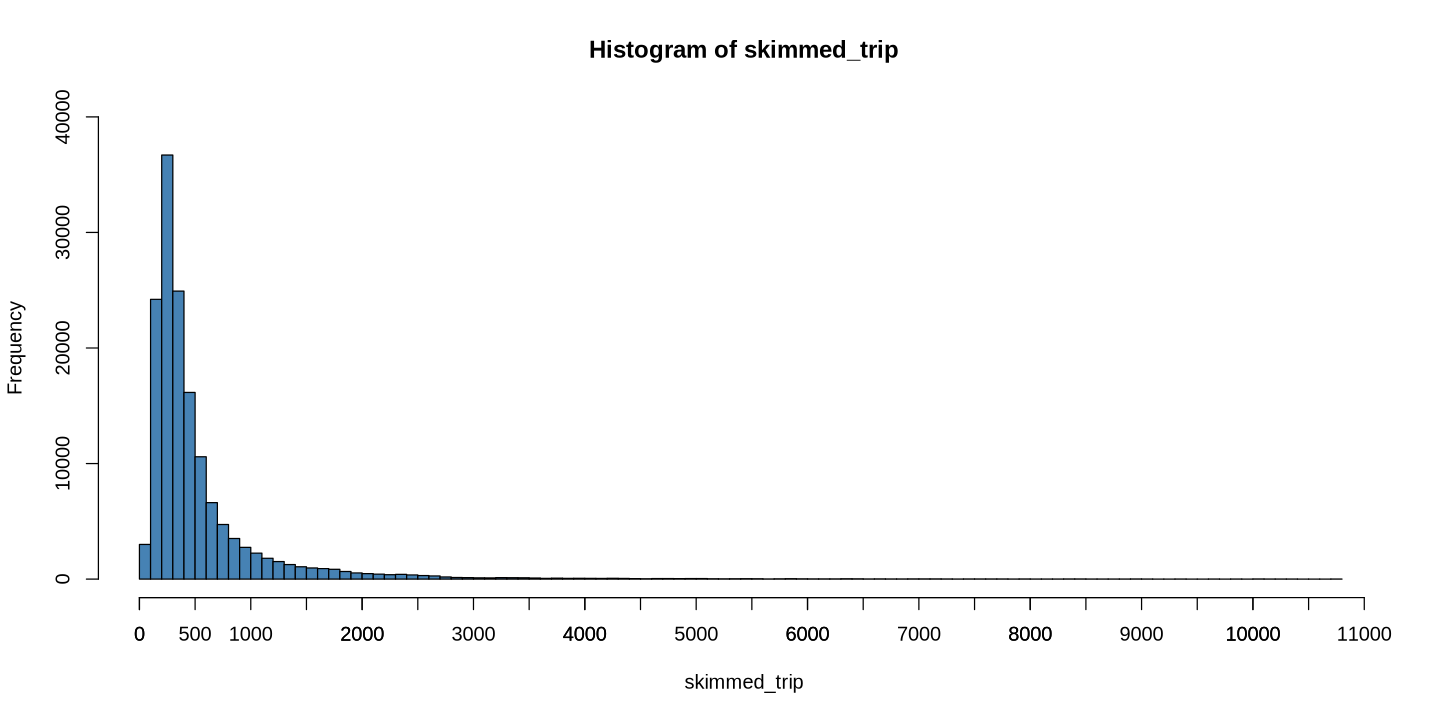

In [39]:
skimmed_trip <- df$tripduration[df$tripduration<10800]
hist(skimmed_trip,
    xlim = range(skimmed_trip),
    ylim = c(0,40000),
    breaks = 100,
    col = "steelblue")

## This line is used to set the number of ticks on the x-axis
axis(side = 1, at = pretty(range(skimmed_trip), n = 25))

5) Plot the monthly average trip duration

[1] "Mean for February(2) : 605.339563695125"
[1] "Mean for March(3) : 546.176353469457"
[1] "Mean for April(4) : 713.995674007744"
[1] "Mean for May(5) : 824.1199944652"
[1] "Mean for June(6) : 973.68995688562"


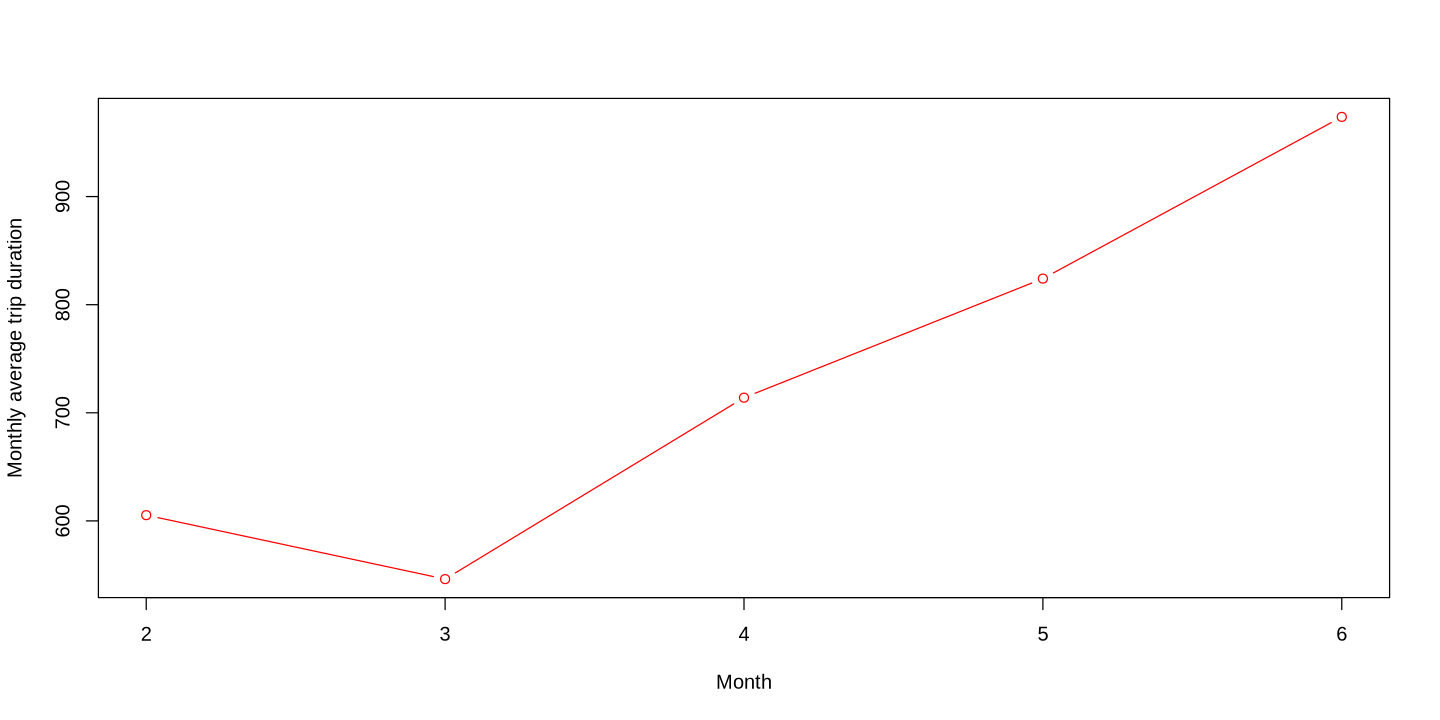

In [51]:
means<-c(mean(df2$tripduration),mean(df3$tripduration),mean(df4$tripduration),mean(df5$tripduration),mean(df6$tripduration))
month<-c("February(2)", "March(3)", "April(4)", "May(5)", "June(6)")

plot(c(2,3,4,5,6),
    means,type='b',
    xlab = "Month",
    ylab = "Monthly average trip duration",
    col='red')
for (i in 2:6){
    print(paste("Mean for",month[i-1],":",means[i-1]))
}

6.1)plot the number of rides per day

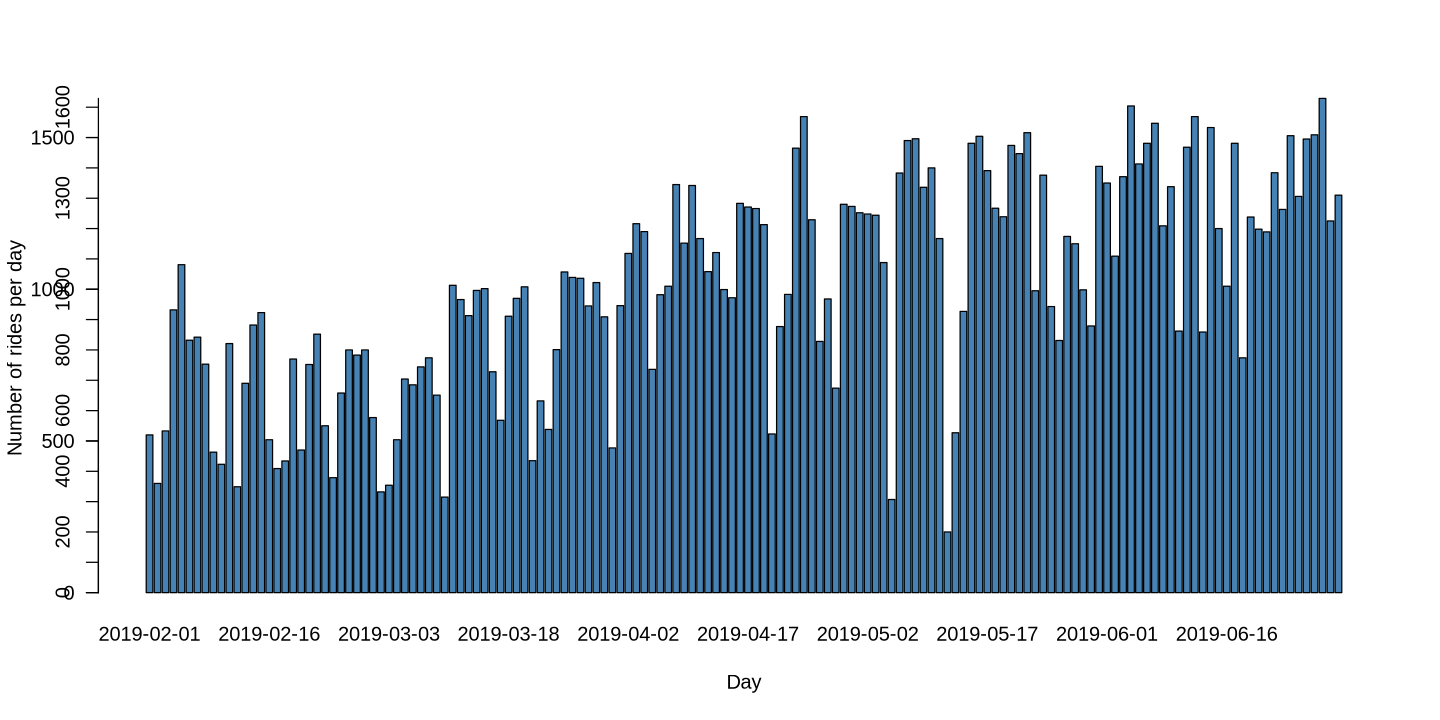

In [77]:
## I add a column containing the start date information to the data.frame object
df$date <- substr(df$starttime,1,10)

rides_per_day <- df %>%
 group_by(date) %>%
 summarize(num_rides = n())

barplot(rides_per_day$num_rides ~ rides_per_day$date,
        xlab = "Day",
        ylab = "Number of rides per day",
        col = "steelblue")

axis(side = 2, at = seq(0, 2000, by = 100), labels = seq(0, 2000, by = 100), las = 1)

6.2) plot the hourly distribution on weekdays and on the weekends

In [15]:
df$hour <- substr(df$starttime,12,13)


In [16]:
df$weekday <- (((as.integer(substr(df$date,9,10)))%%7) %in% c(1,4,5,6,0))

In the cell above I've checked the remainder of the division by 7 of the date of each row and then determined if it was a weekday or not based on the fact that the date 2019/02/01 was a Friday.

In [17]:
rides_h_weekday <- df %>%
    filter(df$weekday) %>%
    group_by(hour) %>%
    summarize(num_rides = n())


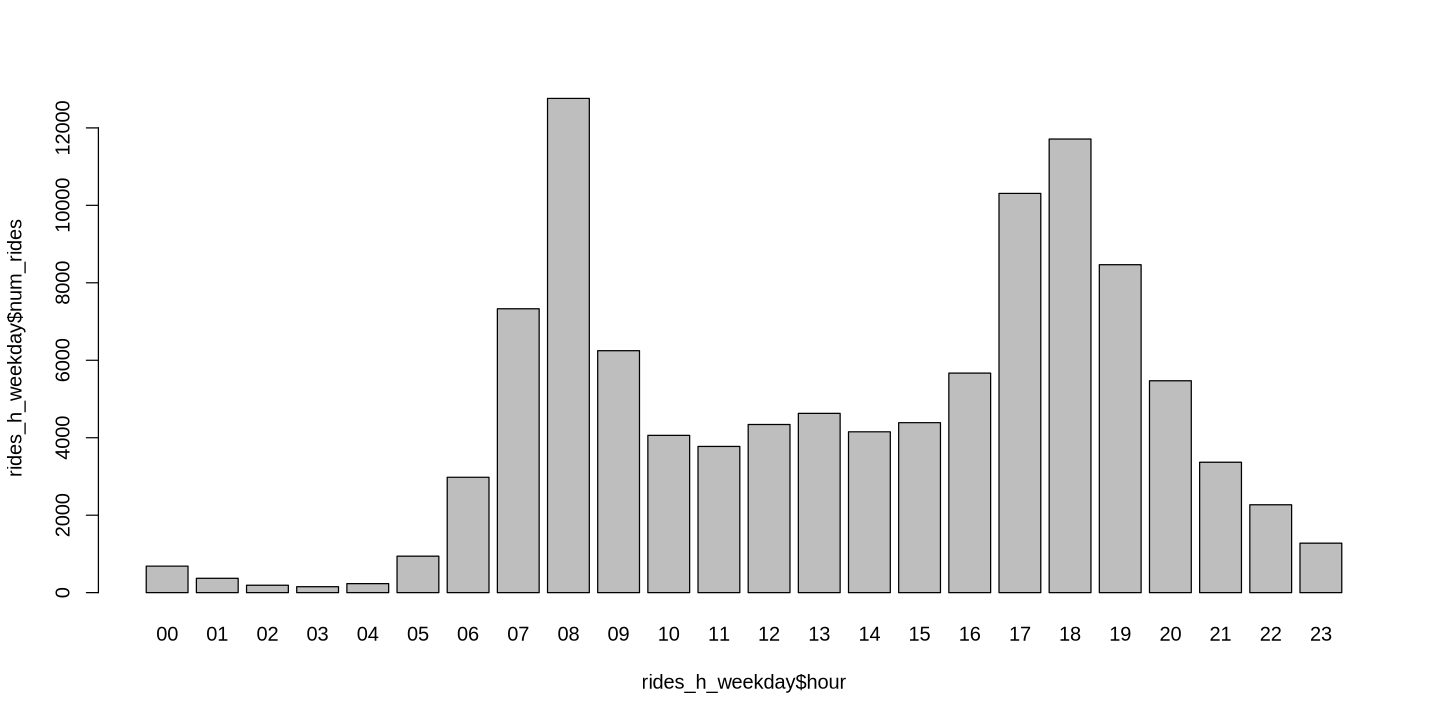

In [38]:
barplot(rides_h_weekday$num_rides ~ rides_h_weekday$hour)

In [19]:
rides_h_weekend <- df %>%
    filter(!df$weekday) %>%
    group_by(hour) %>%
    summarize(num_rides = n())

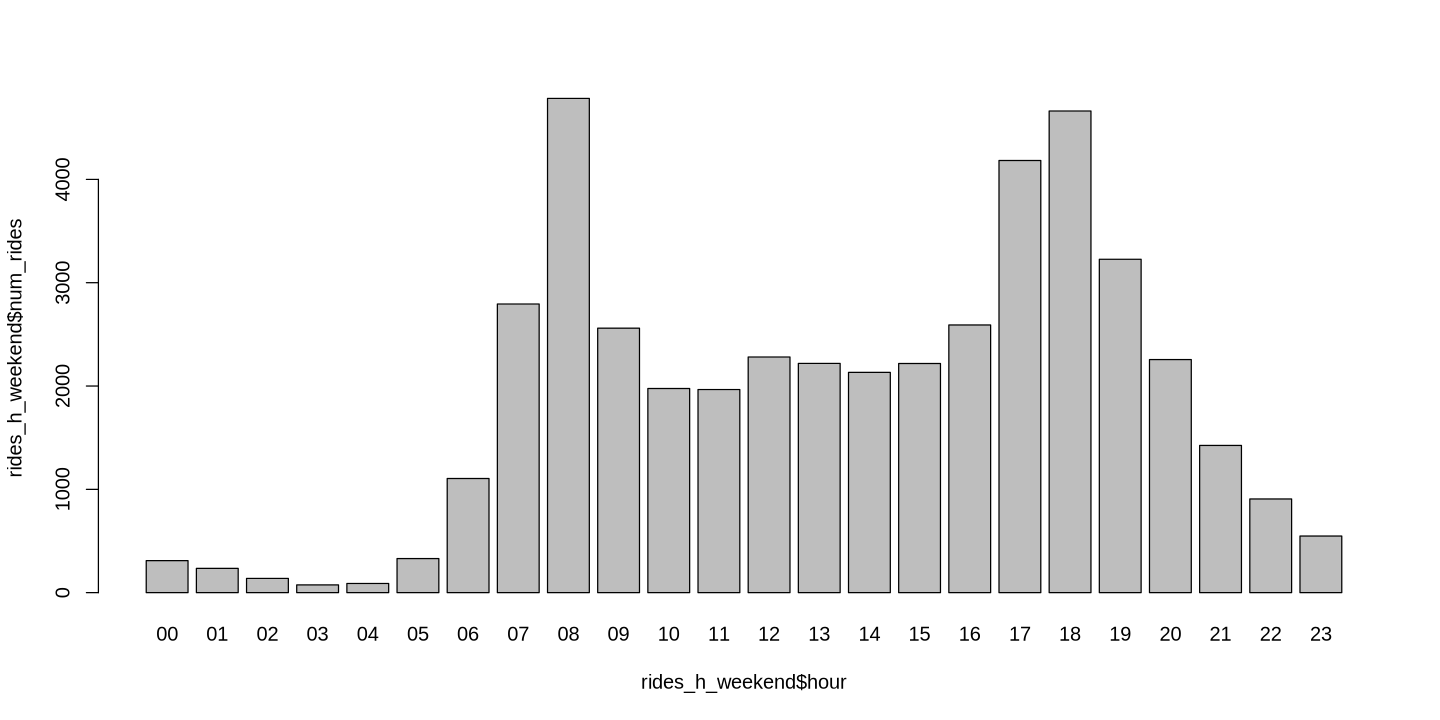

In [20]:
barplot(rides_h_weekend$num_rides ~ rides_h_weekend$hour)

6.3) plot again the average hourly distribution on weekdays but separating customer and subscriber users. 

In [21]:
head(rides_h_weekday)

hour,num_rides
<chr>,<int>
00,685
01,370
02,191
03,154
04,233
05,942


In [22]:
weekdays <- df %>%
    filter(df$weekday)

weekdays_cus <- weekdays %>%
    filter(weekdays$usertype == "Customer")

hour_cus <- weekdays_cus %>%
    group_by(hour) %>%
    summarize(n_rides = n())

weekdays_sub <- weekdays %>%
    filter(weekdays$usertype == "Subscriber")

hour_sub <- weekdays_sub %>%
    group_by(hour) %>%
    summarize(n_rides = n())

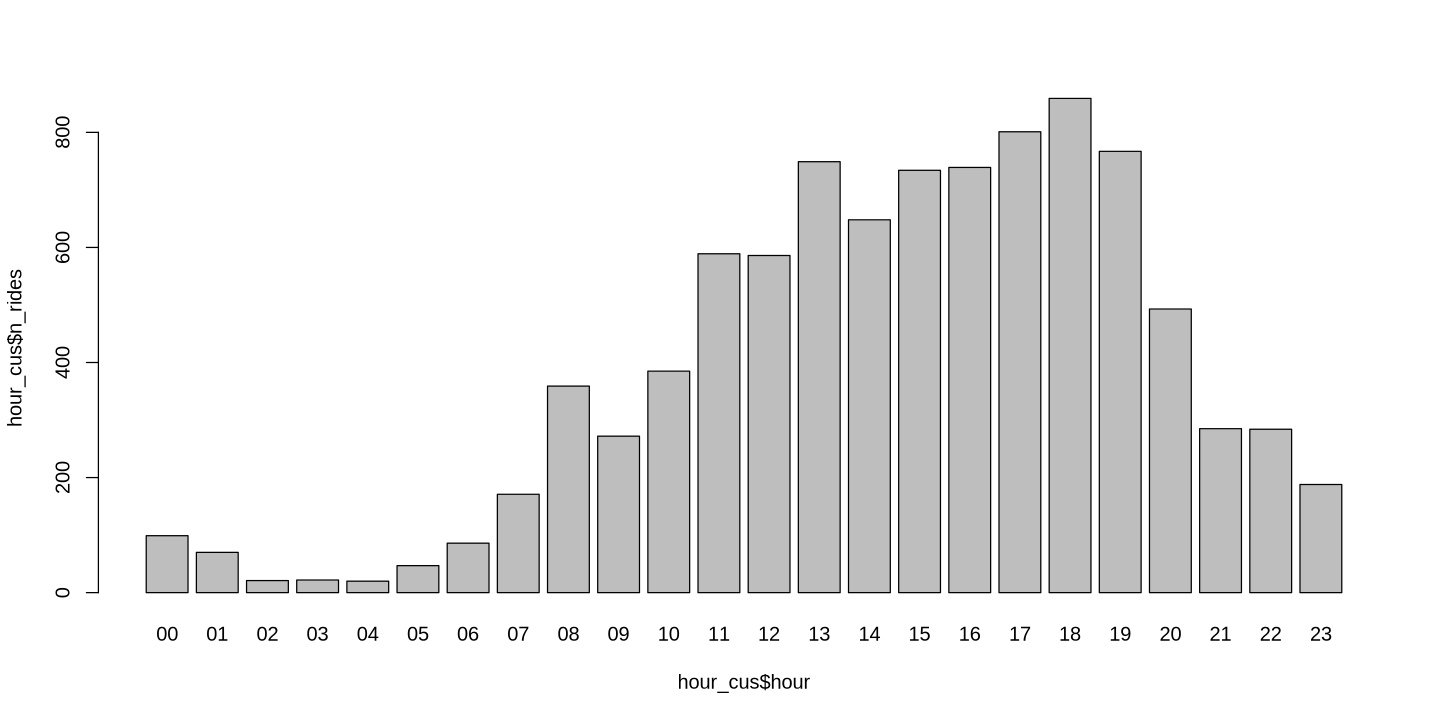

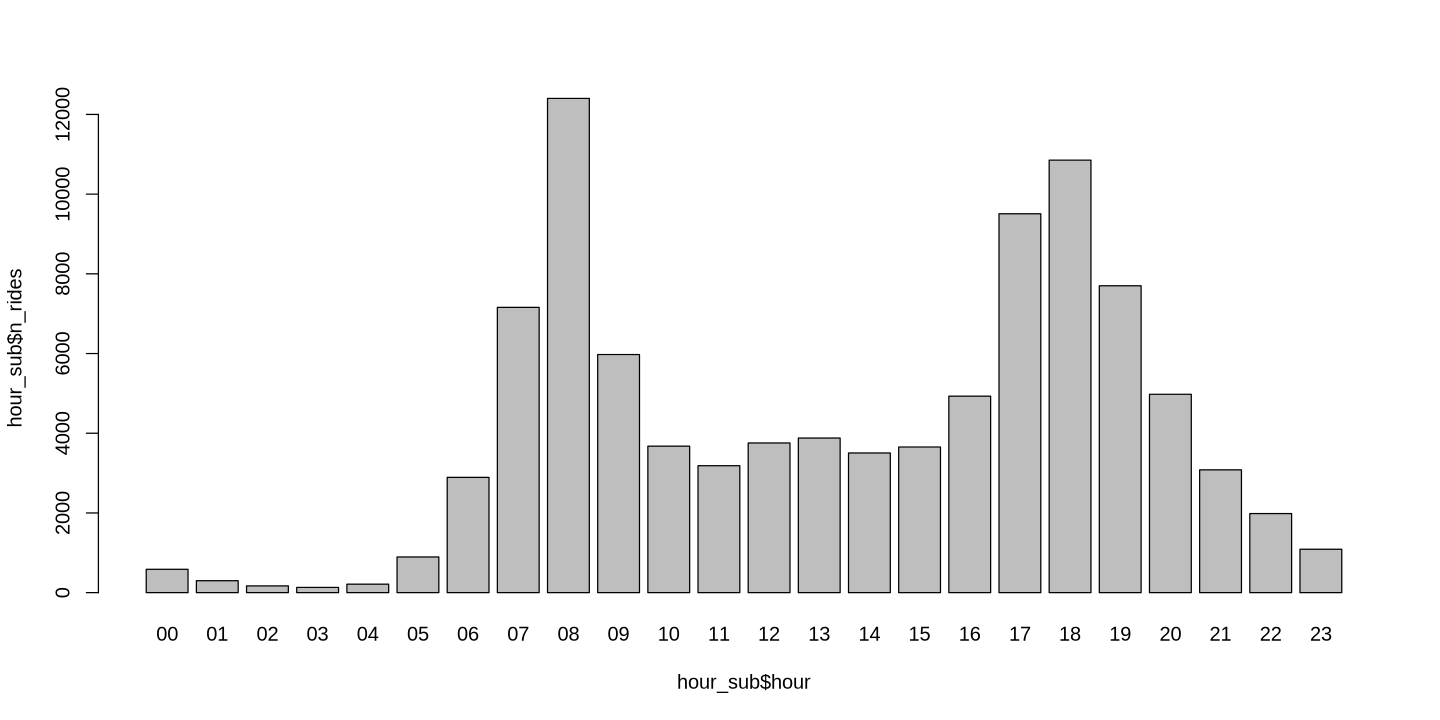

In [23]:
barplot(hour_cus$n_rides ~ hour_cus$hour)
barplot(hour_sub$n_rides ~ hour_sub$hour)

7.1) using the latitude and longitude information, evaluate the average speed (in km/h) of a user, discrding the triplasting longer than 1 hour.

In [24]:
library("geosphere")

In [25]:
av_speed <- function(p1,p2,t){
    return((distHaversine(p1,p2)/t)*3.6)
}

In [26]:
less1hour <- df %>%
    filter(tripduration < 3600)

start <- less1hour %>%
    select(start.station.longitude,start.station.latitude)

end <- less1hour %>%
    select(end.station.longitude,end.station.latitude)

less1hour$avg_speed <- av_speed(start,end,less1hour$tripduration)

7.2) plot the average speed as a function of route length for the following group of distances d <500 m,
500 m <d <1000 m, 1000 m <d <2000 m, 2000 m <d <3000 m, d >3000 m and discarding
trips longer than 1 hour

In [27]:
less1hour$route_length <- distHaversine(start,end)

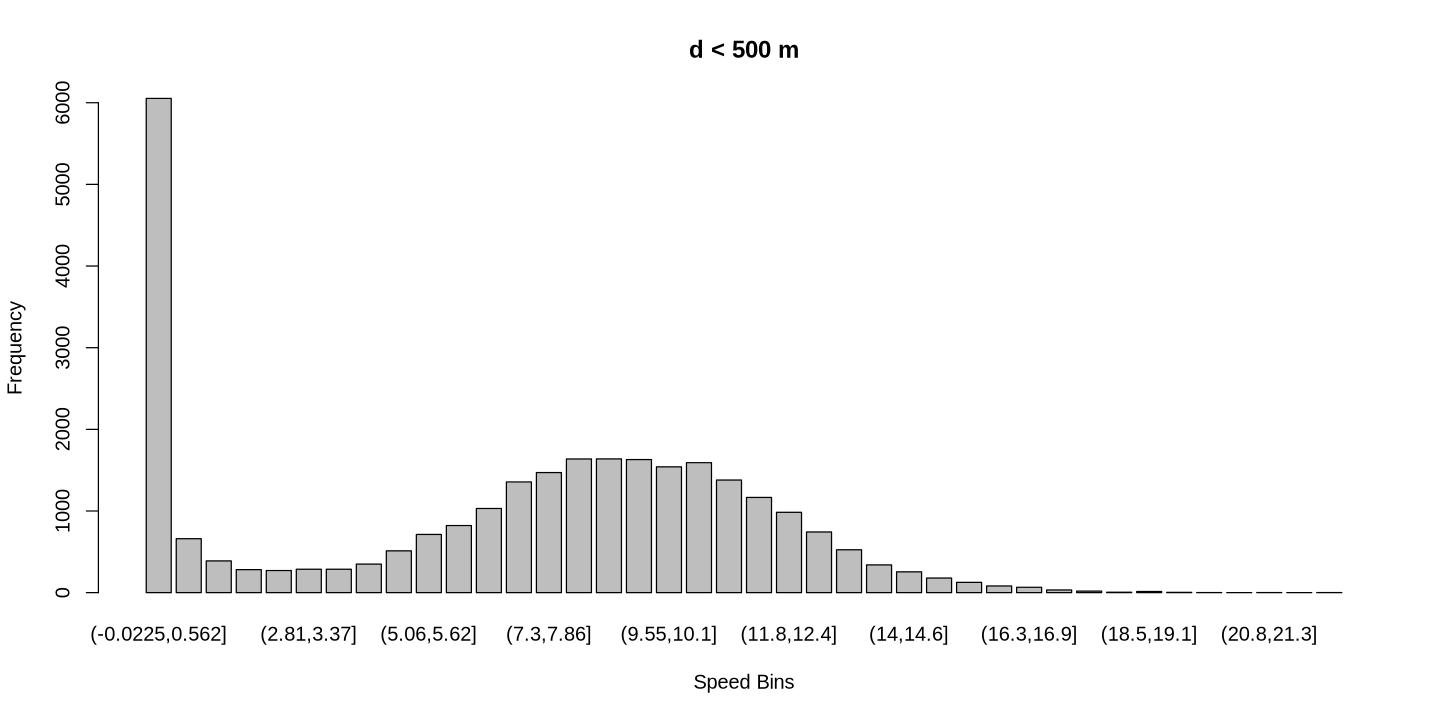

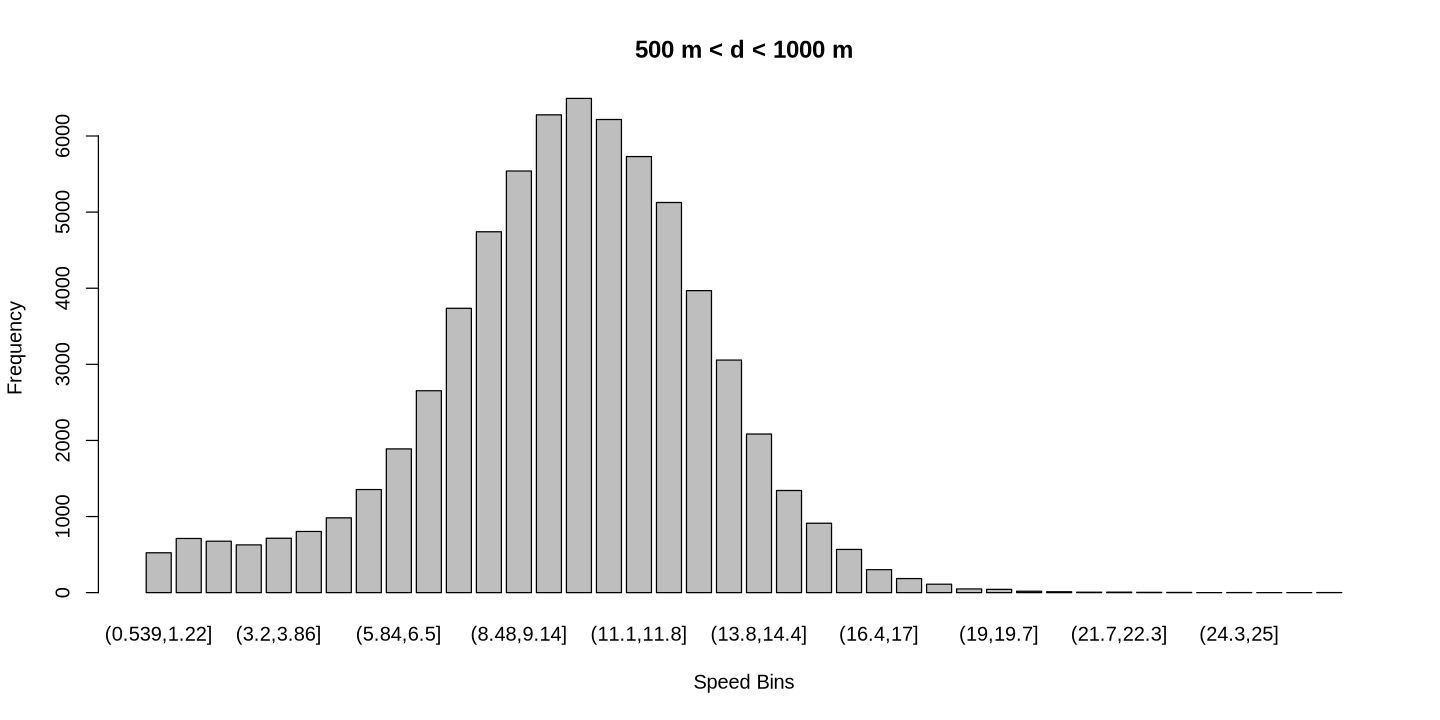

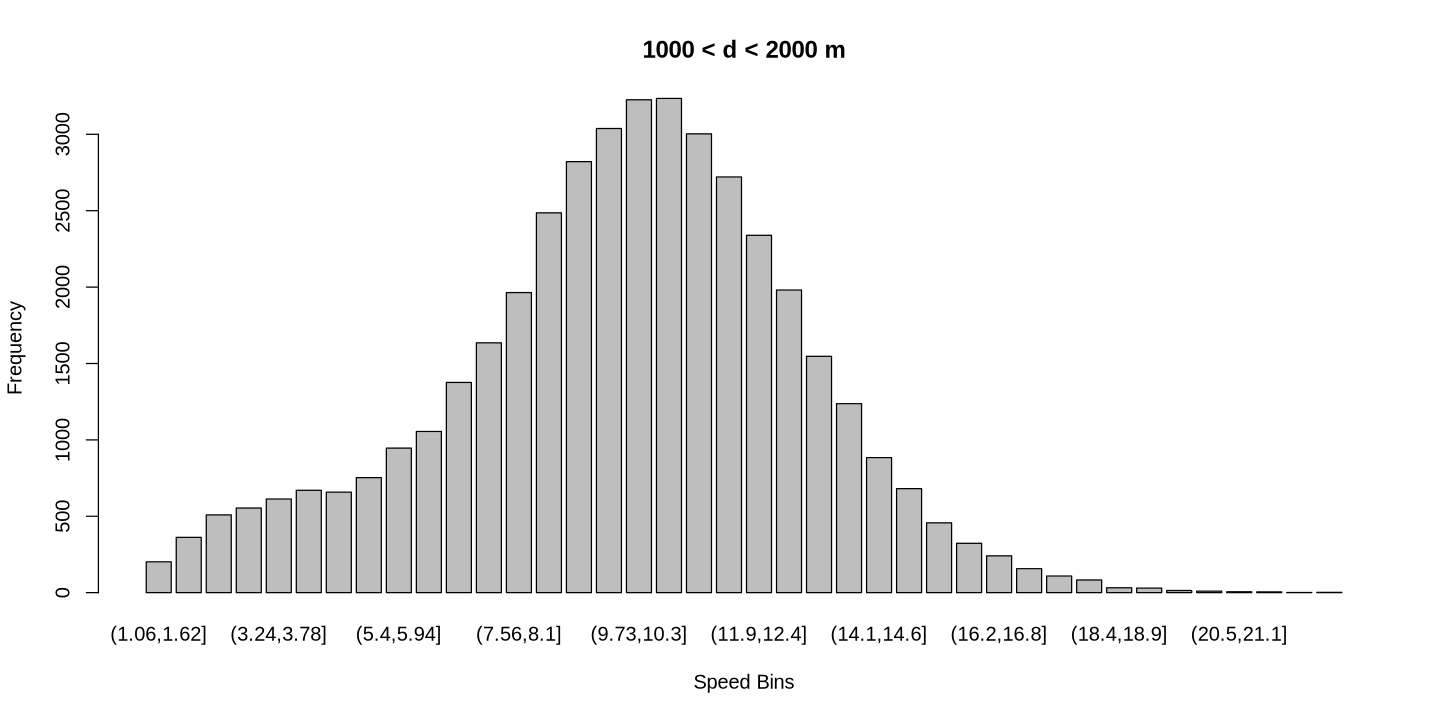

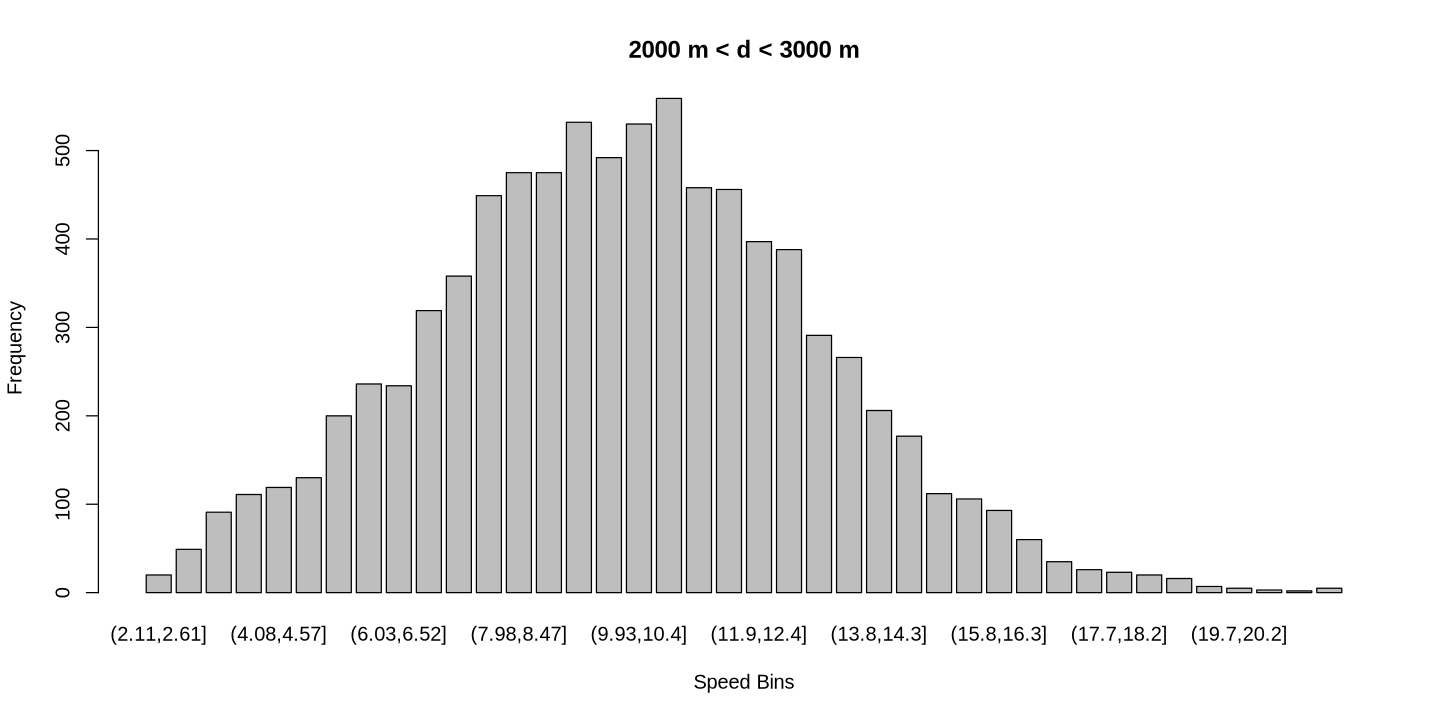

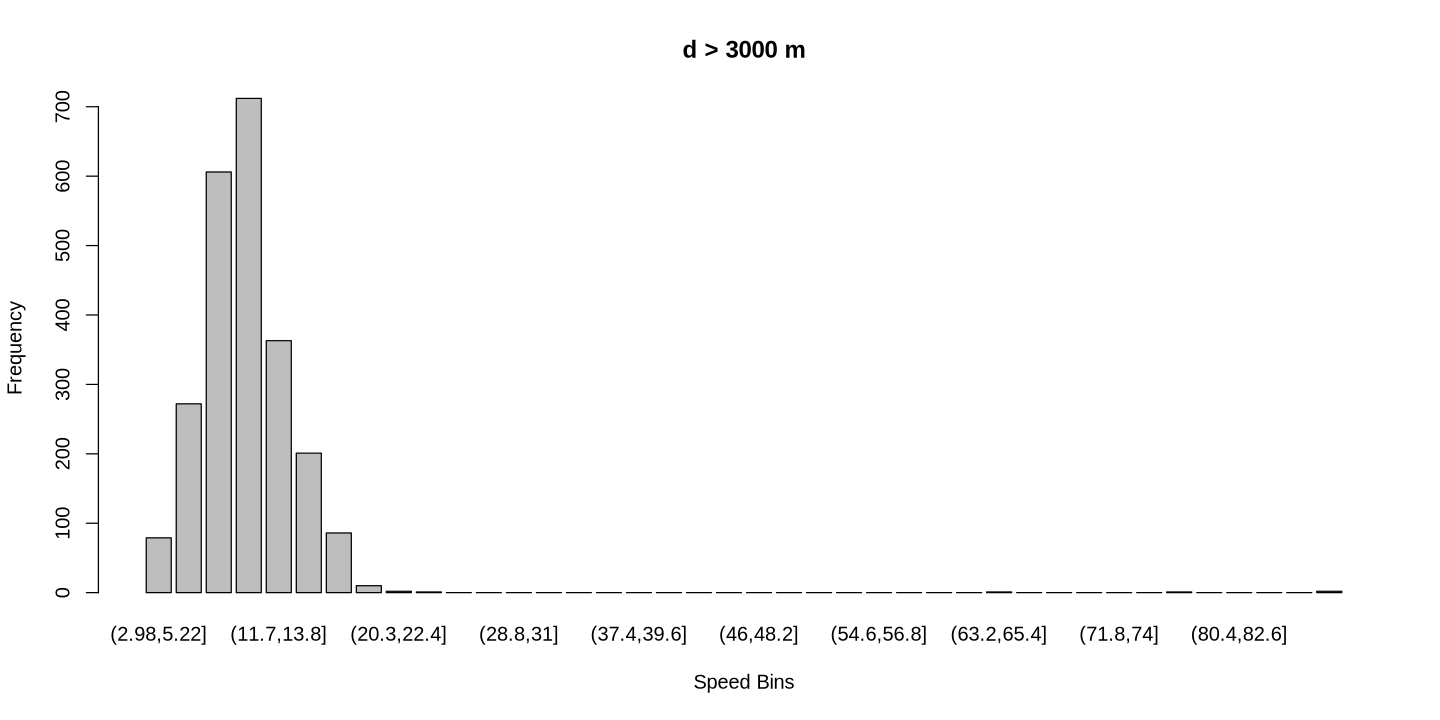

In [28]:
# d < 500 m
a <- less1hour %>%
    filter(route_length<500)

speed_bins <- cut(a$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d < 500 m")

################################################
# 500 m < d < 1000 m
b <- less1hour %>%
    filter(route_length > 500 & route_length < 1000)

speed_bins <- cut(b$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "500 m < d < 1000 m")

################################################
# 1000 m < d < 2000 m
c <- less1hour %>%
    filter(route_length > 1000 & route_length < 2000)

speed_bins <- cut(c$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "1000 < d < 2000 m")

################################################
# 2000 m < d < 3000 m
d <- less1hour %>%
    filter(route_length > 2000 & route_length < 3000)

speed_bins <- cut(d$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "2000 m < d < 3000 m")

################################################
# d > 3000 m
e <- less1hour %>%
    filter(route_length > 3000)

speed_bins <- cut(e$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts,
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d > 3000 m")

7.3) repeat the same graph, but show the results obtained separately for weekdays and weekends

First for weekdays:

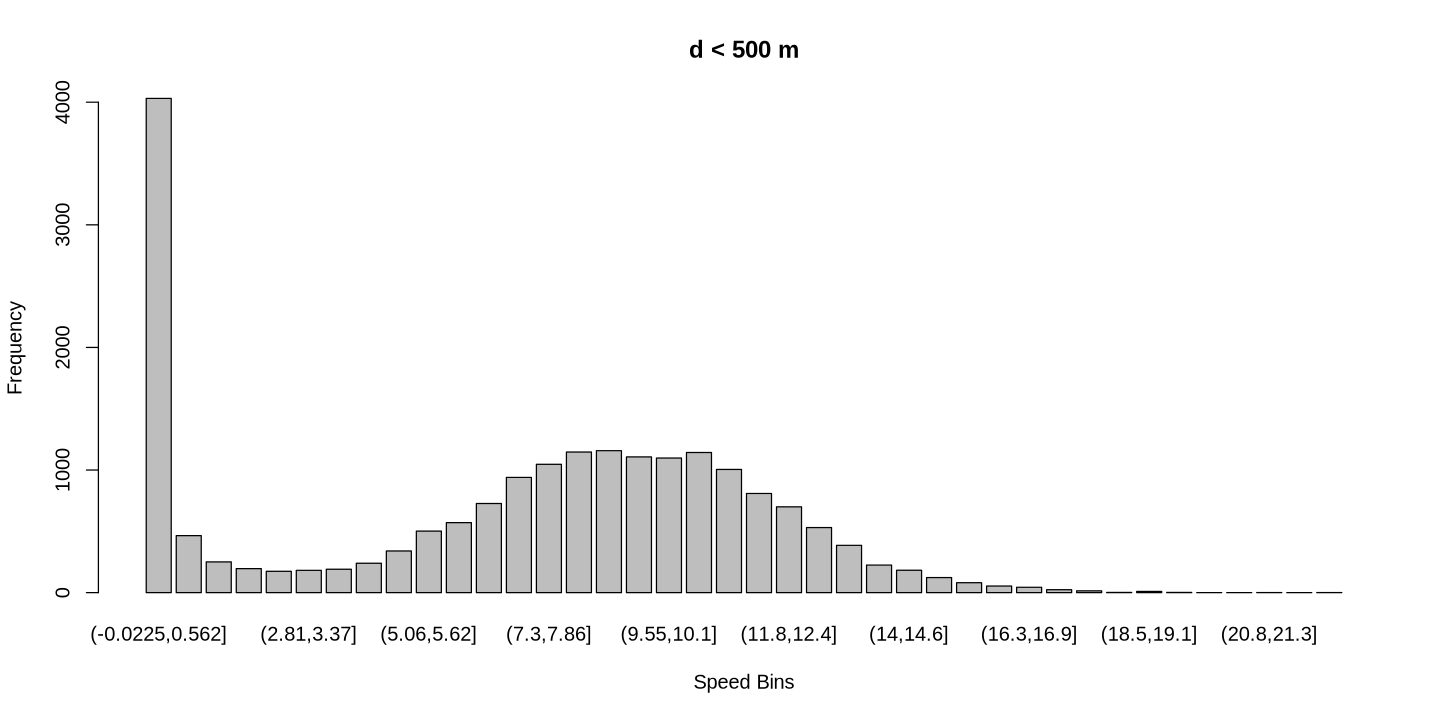

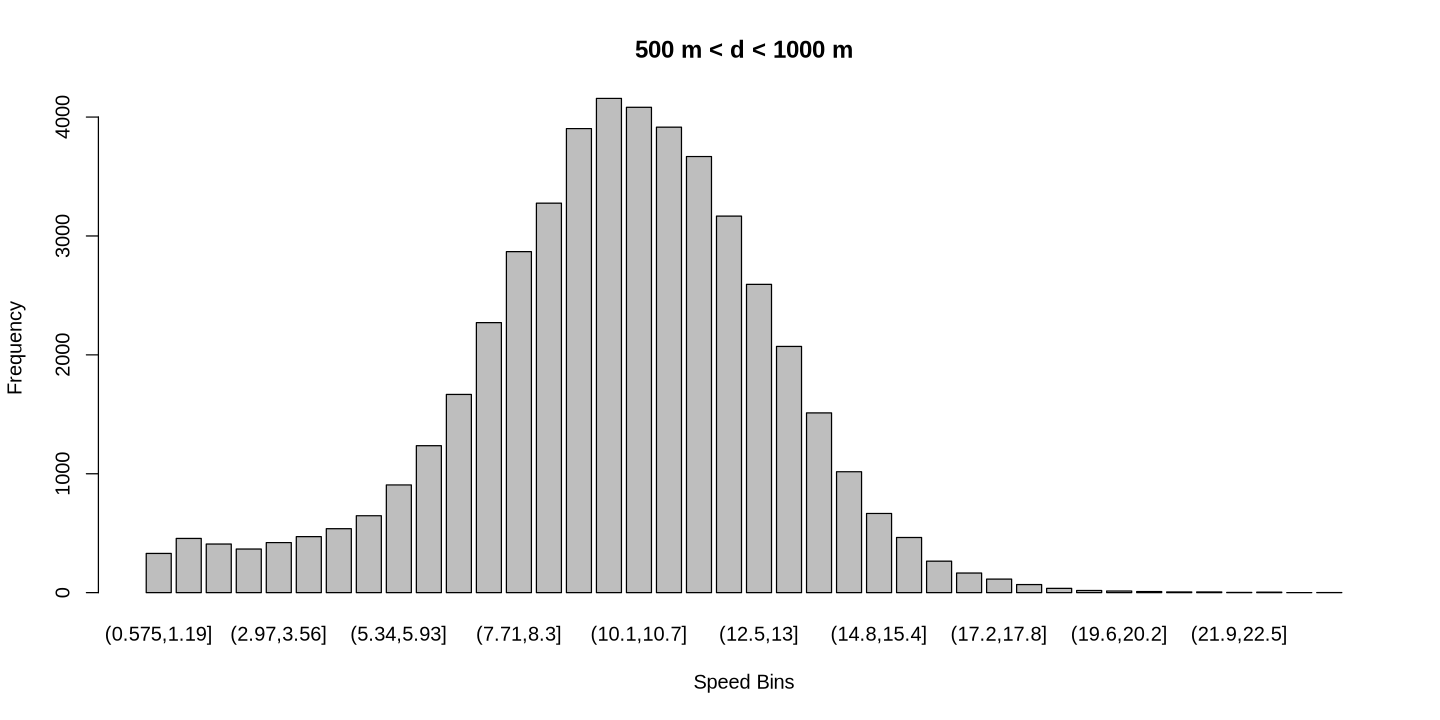

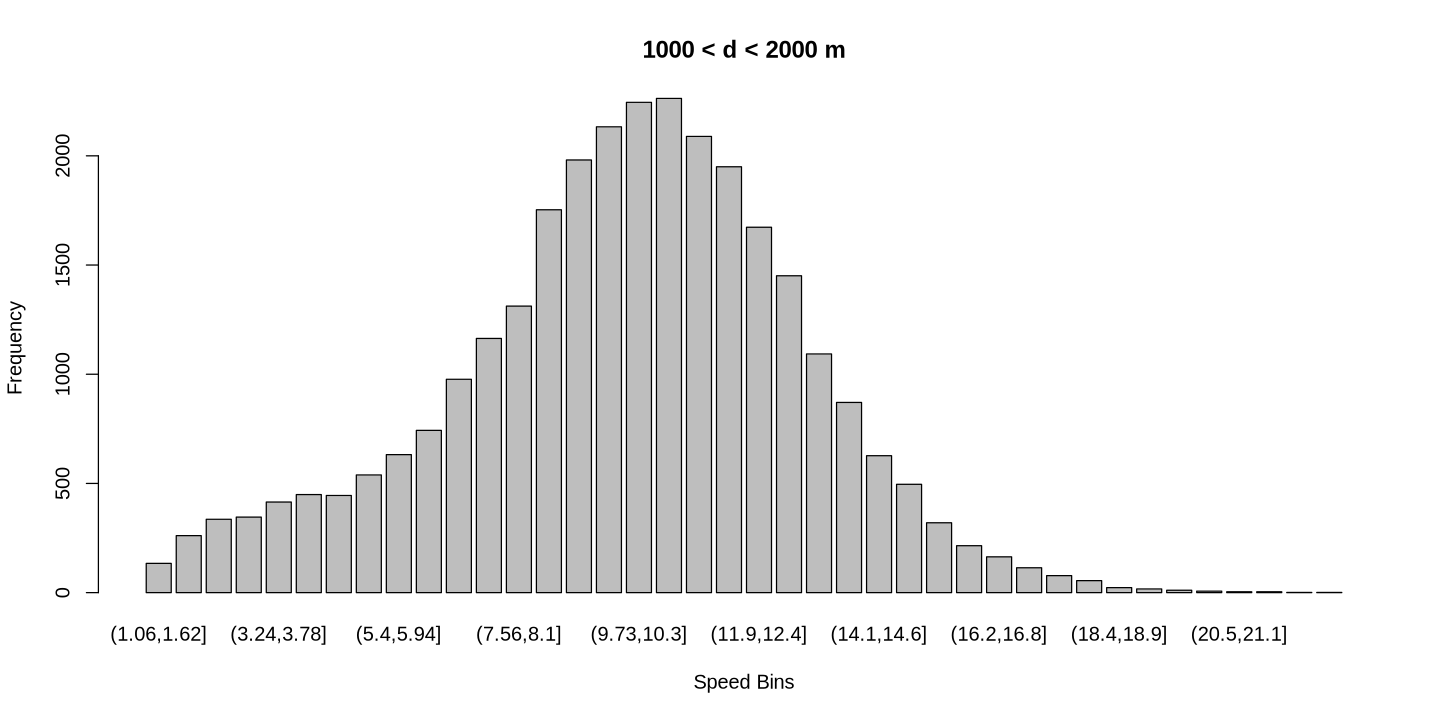

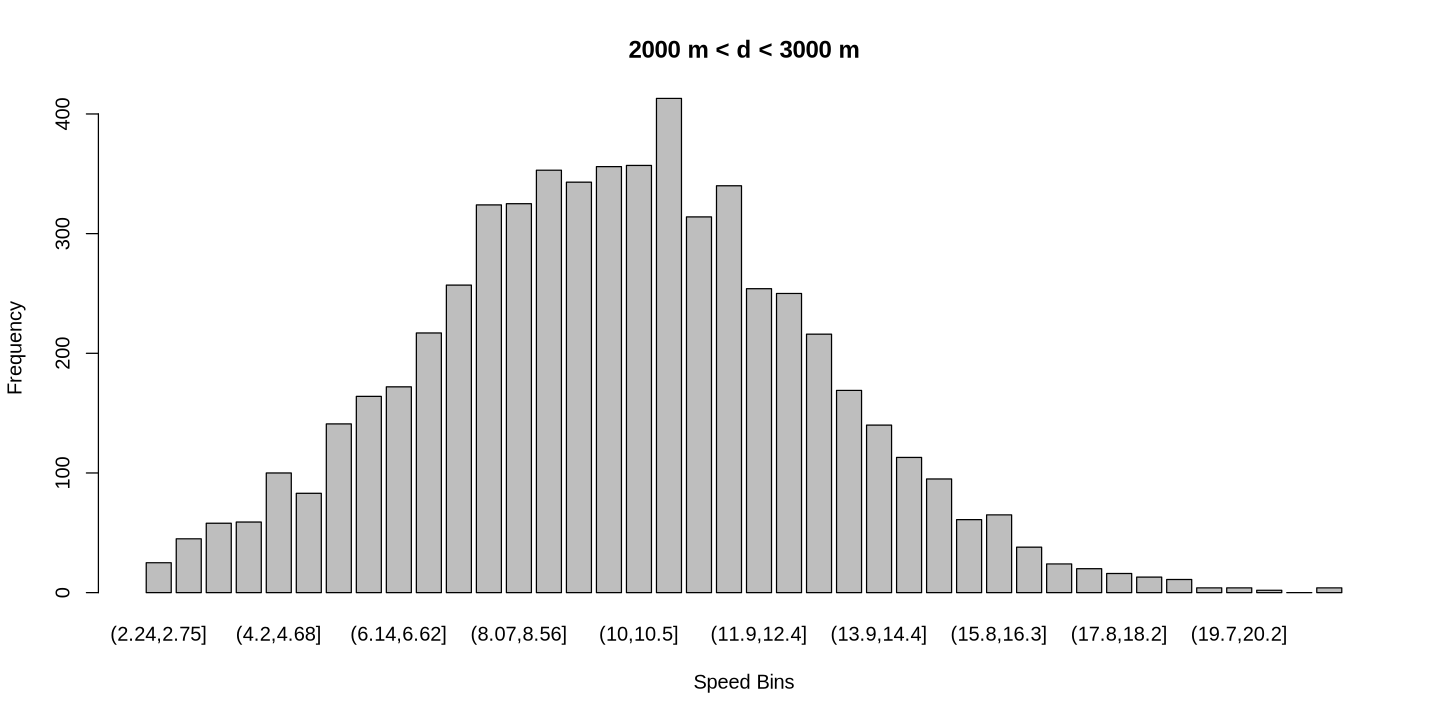

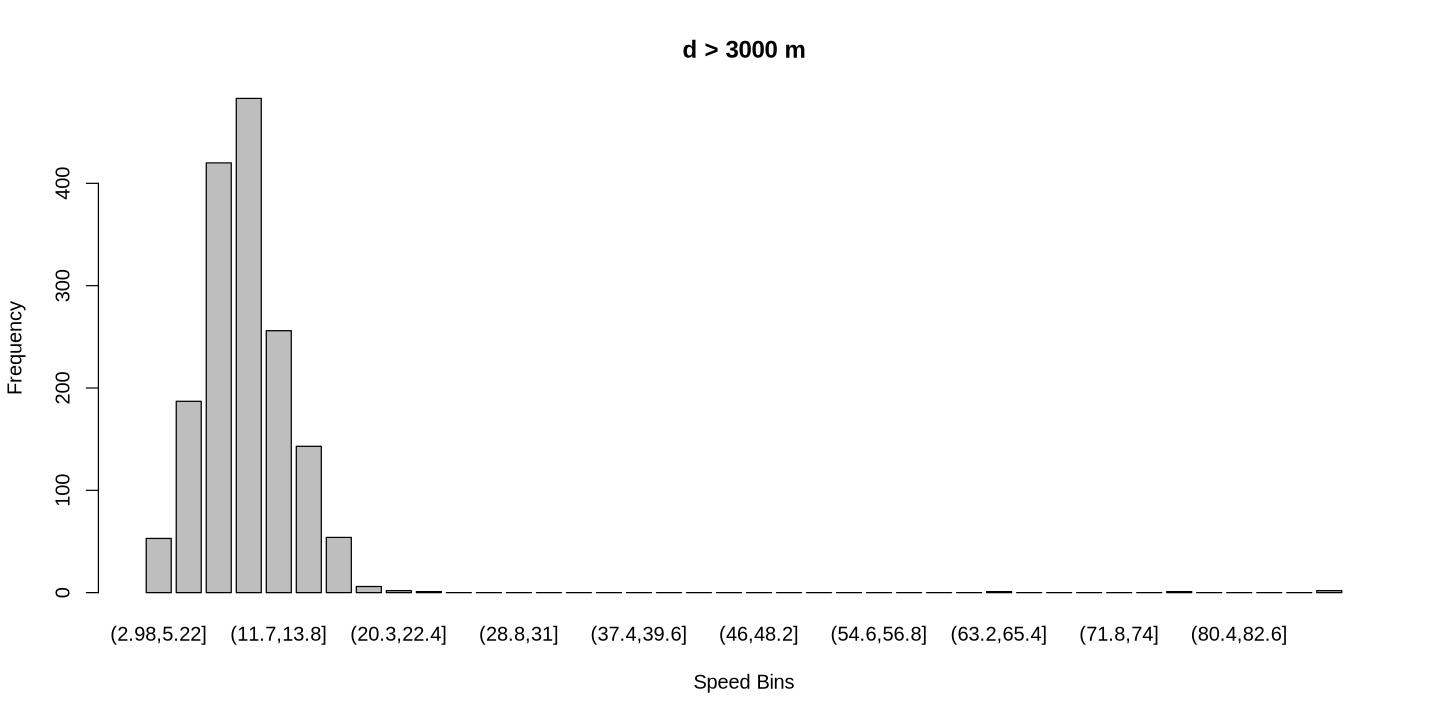

In [29]:

less1hour <- df %>%
    filter(tripduration < 3600)

less1hour_weekday <- less1hour %>%
    filter(weekday)

start <- less1hour_weekday %>%
    select(start.station.longitude,start.station.latitude)

end <- less1hour_weekday %>%
    select(end.station.longitude,end.station.latitude)

less1hour_weekday$avg_speed <- av_speed(start,end,less1hour_weekday$tripduration)

less1hour_weekday$route_length <- distHaversine(start,end)

# d < 500 m
a <- less1hour_weekday %>%
    filter(route_length<500)

speed_bins <- cut(a$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d < 500 m")

################################################
# 500 m < d < 1000 m
b <- less1hour_weekday %>%
    filter(route_length > 500 & route_length < 1000)

speed_bins <- cut(b$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "500 m < d < 1000 m")

################################################
# 1000 m < d < 2000 m
c <- less1hour_weekday %>%
    filter(route_length > 1000 & route_length < 2000)

speed_bins <- cut(c$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "1000 < d < 2000 m")

################################################
# 2000 m < d < 3000 m
d <- less1hour_weekday %>%
    filter(route_length > 2000 & route_length < 3000)

speed_bins <- cut(d$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "2000 m < d < 3000 m")

################################################
# d > 3000 m
e <- less1hour_weekday %>%
    filter(route_length > 3000)

speed_bins <- cut(e$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts,
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d > 3000 m")

Then for weekends:

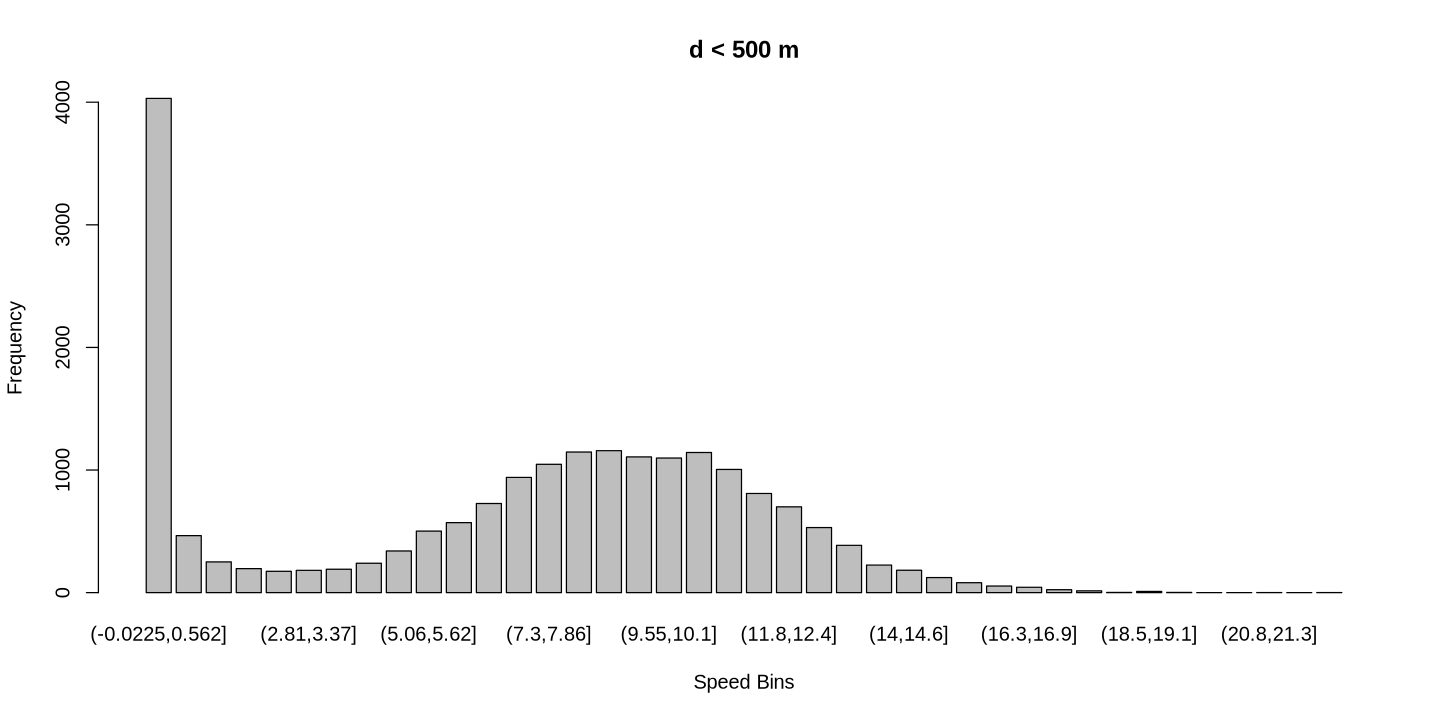

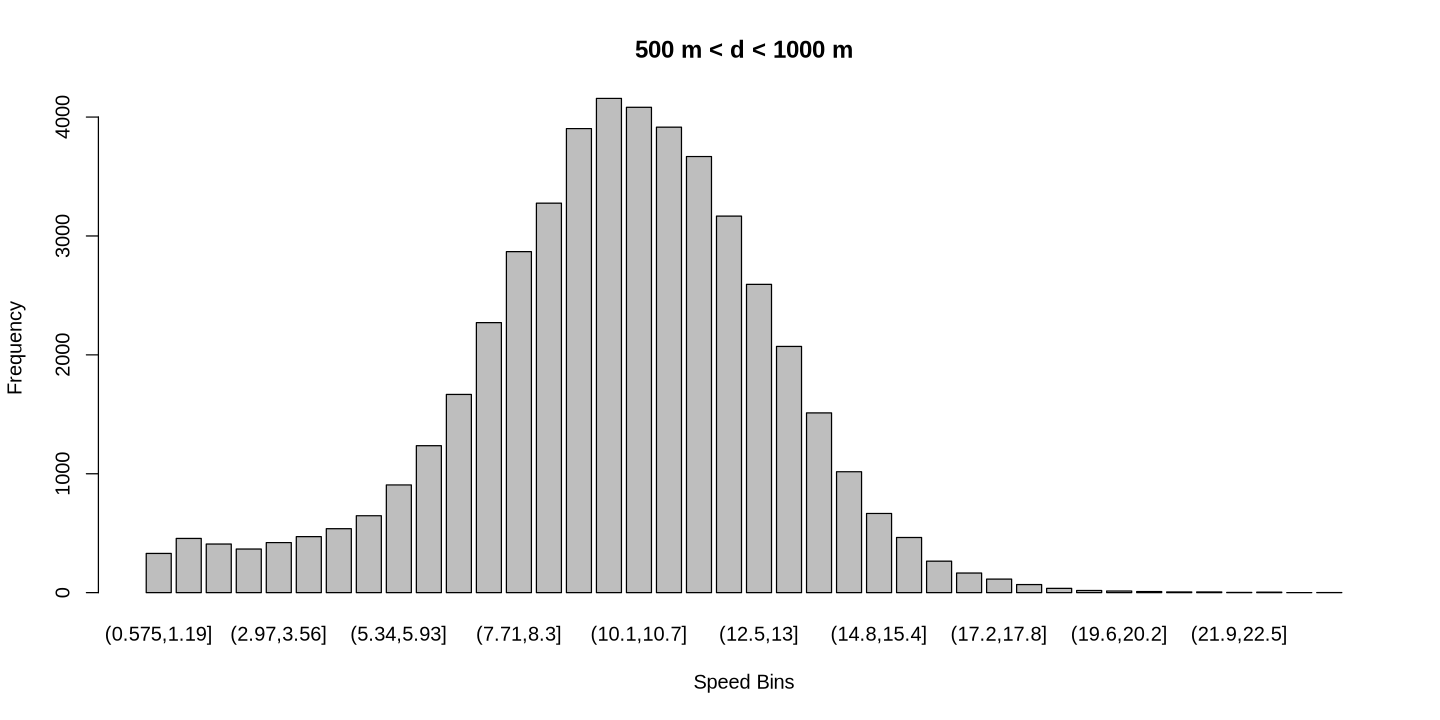

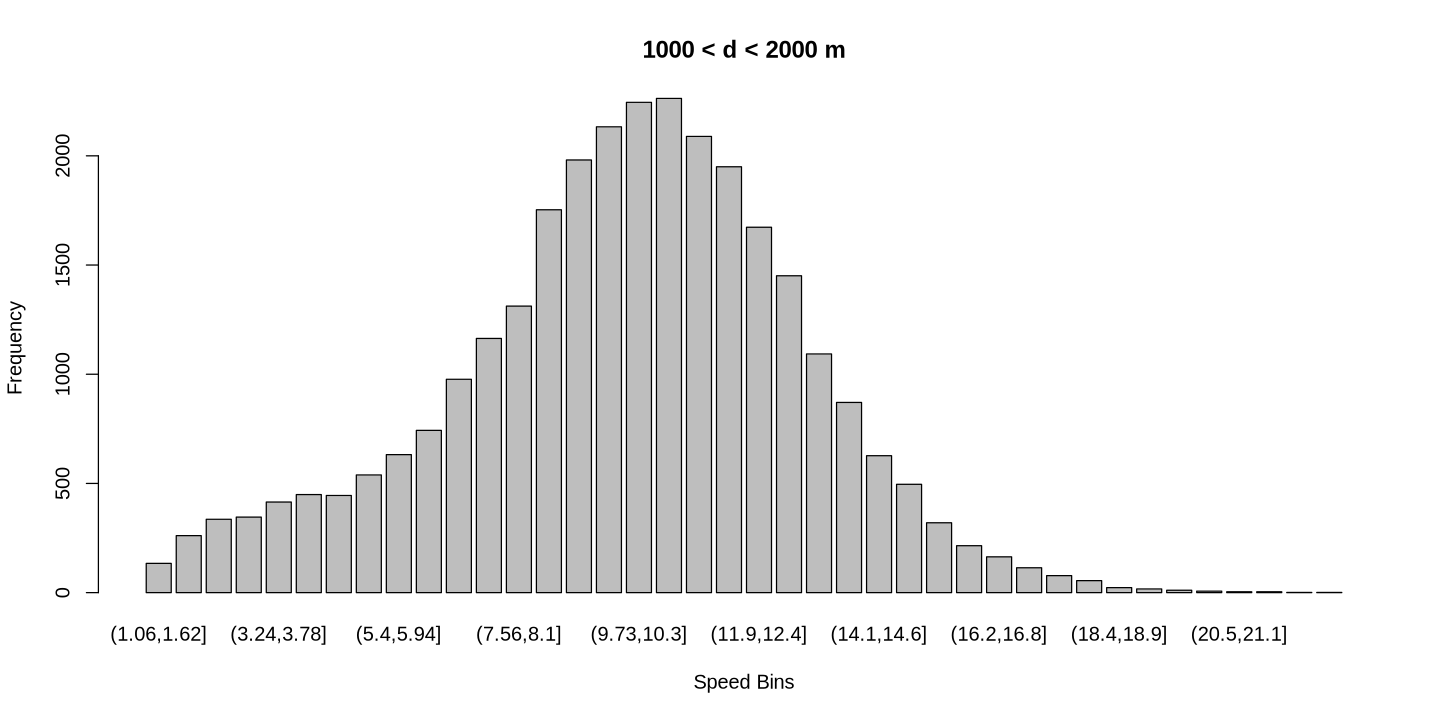

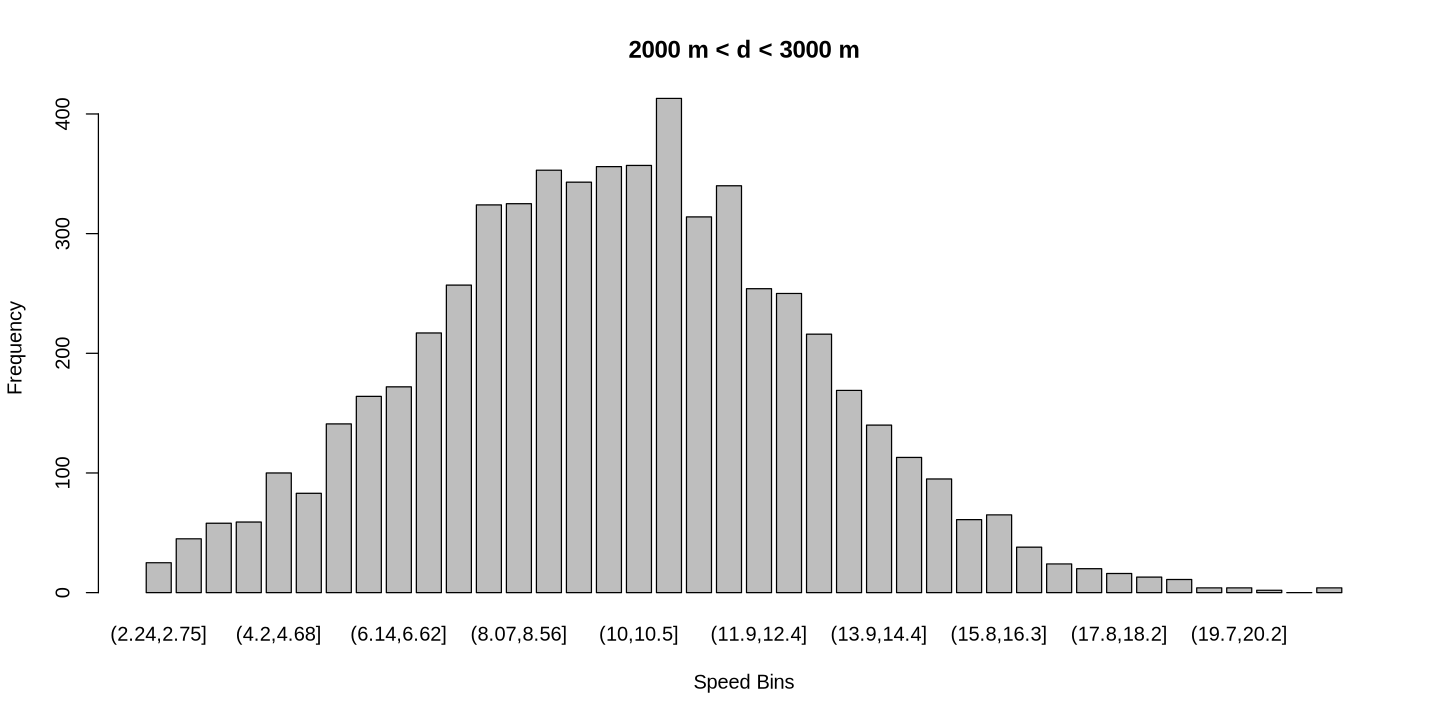

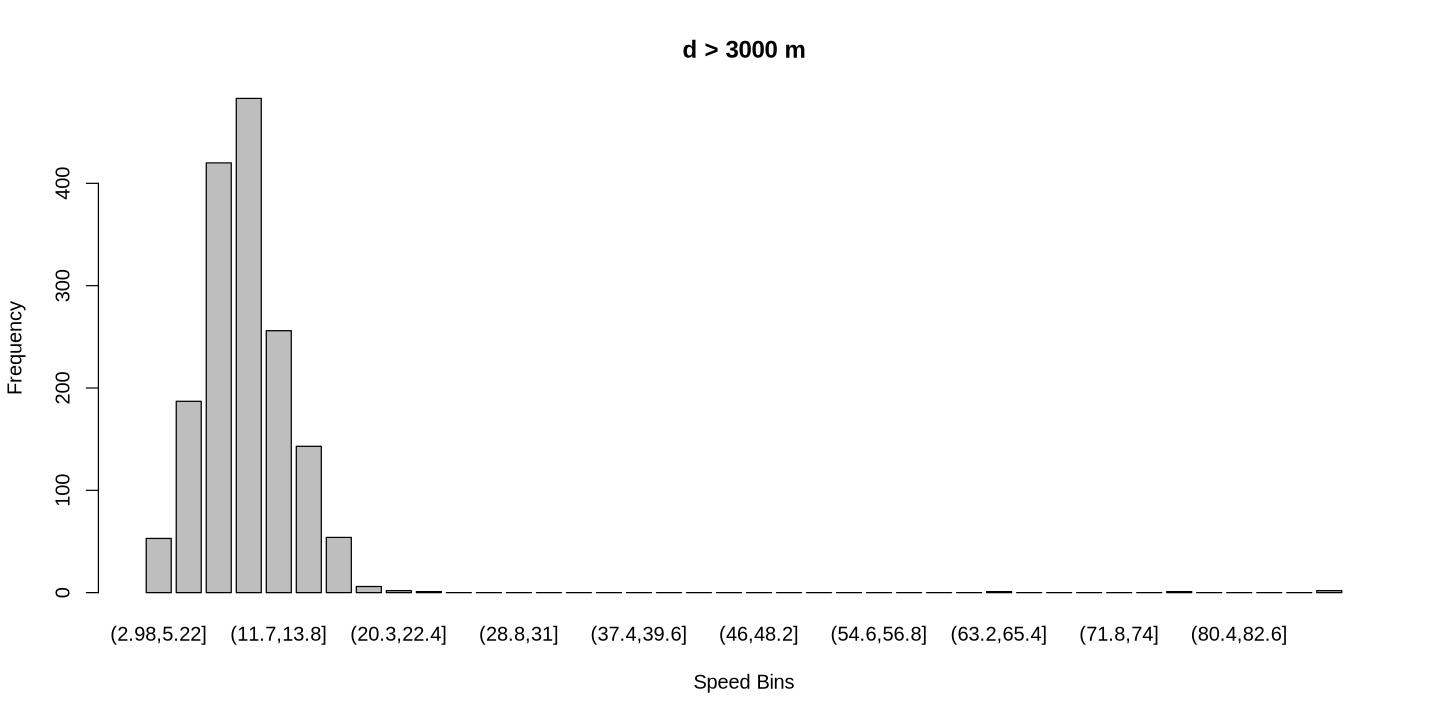

In [30]:

less1hour <- df %>%
    filter(tripduration < 3600)

less1hour_weekends <- less1hour %>%
    filter(weekday)

start <- less1hour_weekends %>%
    select(start.station.longitude,start.station.latitude)

end <- less1hour_weekends %>%
    select(end.station.longitude,end.station.latitude)

less1hour_weekends$avg_speed <- av_speed(start,end,less1hour_weekends$tripduration)

less1hour_weekends$route_length <- distHaversine(start,end)

# d < 500 m
a <- less1hour_weekends %>%
    filter(route_length<500)

speed_bins <- cut(a$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d < 500 m")

################################################
# 500 m < d < 1000 m
b <- less1hour_weekends %>%
    filter(route_length > 500 & route_length < 1000)

speed_bins <- cut(b$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "500 m < d < 1000 m")

################################################
# 1000 m < d < 2000 m
c <- less1hour_weekends %>%
    filter(route_length > 1000 & route_length < 2000)

speed_bins <- cut(c$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "1000 < d < 2000 m")

################################################
# 2000 m < d < 3000 m
d <- less1hour_weekends %>%
    filter(route_length > 2000 & route_length < 3000)

speed_bins <- cut(d$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "2000 m < d < 3000 m")

################################################
# d > 3000 m
e <- less1hour_weekends %>%
    filter(route_length > 3000)

speed_bins <- cut(e$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts,
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d > 3000 m")

8.1) find the most common start station and the least popular end station

In [31]:
n_start_count <- df %>%
    group_by(start.station.name) %>%
    summarize(counts = n())

n_end_count <- df %>%
    group_by(end.station.name) %>%
    summarize(counts = n())

sorted_start <- n_start_count %>%
    arrange(desc(counts), .by_group = TRUE)

sorted_end <- n_end_count %>%
    arrange(desc(counts), .by_group = TRUE)

print(paste("Most popular start station:",head(sorted_start$start.station.name,n=1)))
print(paste("Most popular end station:",head(sorted_end$end.station.name,n=1)))

sorted_start <- n_start_count %>%
    arrange(counts, .by_group = TRUE)

sorted_end <- n_end_count %>%
    arrange(counts, .by_group = TRUE)

print(paste("Least popular start station:",head(sorted_start$start.station.name,n=1)))
print(paste("Least popular end station:",head(sorted_end$end.station.name,n=1)))


[1] "Most popular start station: Grove St PATH"
[1] "Most popular end station: Grove St PATH"
[1] "Least popular start station: JCBS Depot"
[1] "Least popular end station: 1 Ave & E 16 St"


8.2) show the distribution of start stations

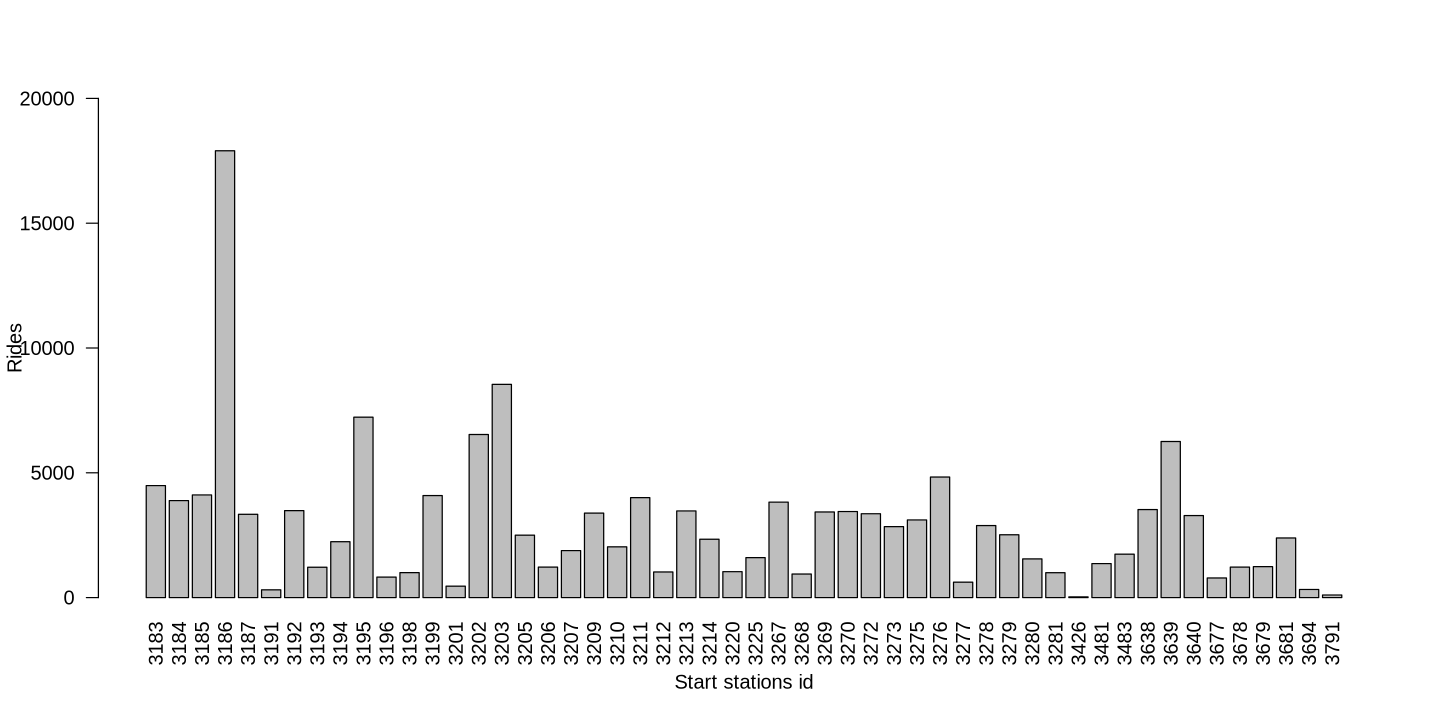

In [32]:
n_start_count <- df %>%
    group_by(start.station.id) %>%
    summarize(counts = n())

barplot(n_start_count$counts ~ n_start_count$start.station.id,
        width = 100,
        ylim = c(0,20000),
        xlab = "Start stations id",
        ylab = "Rides",
        las = 2)


8.3) find the three most common routes (start and end station) and the three least popular ones

In [33]:
route_count <- df %>%
    select(start.station.id, start.station.name, end.station.id, end.station.name) %>%
    group_by(start.station.id, start.station.name, end.station.id, end.station.name, .add = TRUE) %>%
    summarize(nrides = n(), .groups = "keep") %>%
    arrange(desc(nrides))

print("The three most popular routes (start and end station):")
head(route_count, n = 3)

route_count <- df %>%
    select(start.station.id, start.station.name, end.station.id, end.station.name) %>%
    group_by(start.station.id, start.station.name, end.station.id, end.station.name, .add = TRUE) %>%
    summarize(nrides = n(), .groups = "keep") %>%
    arrange(nrides)

print("The three least popular routes (start and end station):")
head(route_count, n = 3)

[1] "The three most popular routes (start and end station):"


start.station.id,start.station.name,end.station.id,end.station.name,nrides
<int>,<chr>,<int>,<chr>,<int>
3203,Hamilton Park,3186,Grove St PATH,3037
3186,Grove St PATH,3203,Hamilton Park,2318
3269,Brunswick & 6th,3186,Grove St PATH,1916


[1] "The three least popular routes (start and end station):"


start.station.id,start.station.name,end.station.id,end.station.name,nrides
<int>,<chr>,<int>,<chr>,<int>
3183,Exchange Place,224,Spruce St & Nassau St,1
3183,Exchange Place,311,Norfolk St & Broome St,1
3183,Exchange Place,3679,Bergen Ave,1
